In [1]:
# The ultimate target feature: time from one stop to another

# Imports
import pandas as pd
import numpy as np
from datetime import date, datetime
from patsy import dmatrices
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_graphviz, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz 
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from statsmodels.formula.api import ols

# Read csv file into a dataframe.
df = pd.read_csv('csv_data/bus_route4_clean.csv')

# 1.0 Model Analysis

## 1.1 Random Forest Regression

In [2]:
y, X = dmatrices('time_diff_to_destination ~ distance_to_end + Temperature + Humidity + HourOfDay +IsWeekend + SchoolHoliday + Vehicle_Journey_ID + Start_date', df, return_type="dataframe") 
y = np.ravel(y)
X.head(5)

,Intercept,Start_date[T.2013-01-02],Start_date[T.2013-01-03],Start_date[T.2013-01-04],Start_date[T.2013-01-05],Start_date[T.2013-01-06],Start_date[T.2013-01-07],Start_date[T.2013-01-08],Start_date[T.2013-01-09],Start_date[T.2013-01-10],...,Start_date[T.2013-01-29],Start_date[T.2013-01-30],Start_date[T.2013-01-31],distance_to_end,Temperature,Humidity,HourOfDay,IsWeekend,SchoolHoliday,Vehicle_Journey_ID
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,46.0,2.0,89.0,8.0,0.0,1.0,15475.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,45.0,2.0,89.0,8.0,0.0,1.0,15475.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,44.0,2.0,89.0,8.0,0.0,1.0,15475.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.0,2.0,89.0,8.0,0.0,1.0,15475.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,42.0,2.0,89.0,8.0,0.0,1.0,15475.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=33) 

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [5]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=10))

In [6]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [7]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [8]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
pred = clf.predict(X_test)

In [10]:
r2_score(y_test, pred)

0.80081433353886522

Good, closer to 1 the better

In [11]:
mean_squared_error(y_test, pred)

2.1354741688694621e+17

Good, closer to 0 the better.

This saves the model for later.

In [12]:
joblib.dump(clf, '../flask_app/static/rf_regressor.pkl')

['../flask_app/static/rf_regressor.pkl']

In [13]:
X_test.head()

,Intercept,Start_date[T.2013-01-02],Start_date[T.2013-01-03],Start_date[T.2013-01-04],Start_date[T.2013-01-05],Start_date[T.2013-01-06],Start_date[T.2013-01-07],Start_date[T.2013-01-08],Start_date[T.2013-01-09],Start_date[T.2013-01-10],...,Start_date[T.2013-01-29],Start_date[T.2013-01-30],Start_date[T.2013-01-31],distance_to_end,Temperature,Humidity,HourOfDay,IsWeekend,SchoolHoliday,Vehicle_Journey_ID
26023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40.0,5.8,82.0,17.0,0.0,0.0,11071.0
4167,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,34.0,5.8,82.0,11.0,0.0,1.0,4577.0
15128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,41.0,5.8,82.0,15.0,0.0,0.0,4942.0
16508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,35.0,5.8,82.0,7.0,0.0,0.0,4936.0
14590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,44.0,5.8,82.0,12.0,0.0,0.0,4546.0


This can then be reloaded to be used in the flask app. As seen below.

In [14]:
clf2 = joblib.load('../flask_app/static/rf_regressor.pkl')

In [15]:
clf2.predict(X_test)

array([  1.68100000e+08,   9.26800000e+08,   1.22600000e+09, ...,
         0.00000000e+00,   2.20250000e+09,   3.23400000e+08])

In [16]:
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [17]:
df.shape

(67489, 28)

## To Do

Date is in the model as a variable making significant impact as cannot group random forest by dates - to confirm why it makes an impact (improves score about 7% but we should  understand is this equiv to groupby or coincidence or a proxy for events).

Getting a memory error with feature importance so for now using the linear results to guide - issue with rain: clearly important - we know that - and humidity is important, but no rain columns are making any impact. See commented out code below.

In [18]:
#rfc.fit(X_train, y_train)

In [19]:
#pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

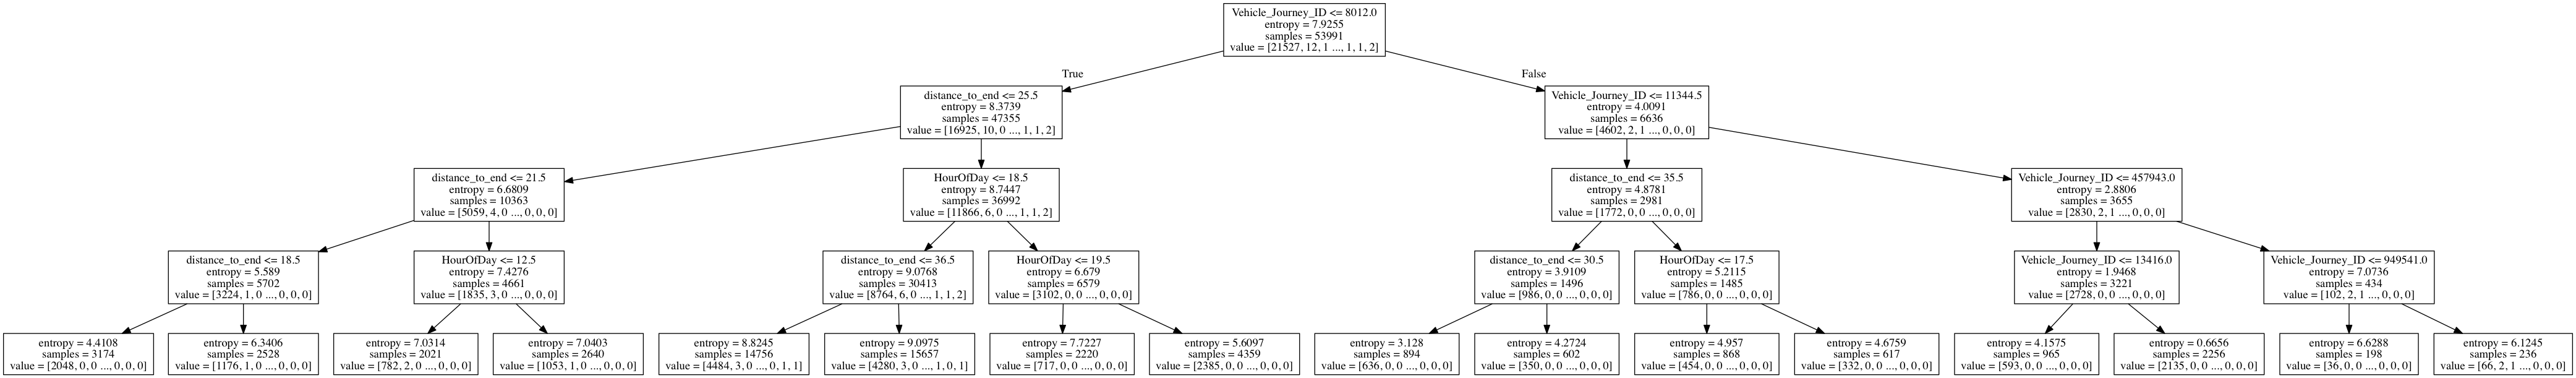

In [22]:
tree.export_graphviz(clf, out_file='tree.dot', feature_names = X_train.columns)
!dot -Tpng tree.dot > tree.png
from IPython.display import Image 
Image(filename='tree.png')